## Linear Least Squares Regression

### Algorithm for linear regression
SUB Regress(x, y, n, al, a0, syx, r2) <br>
sumx = 0: sumxy = 0: st = 0 <br>
sumy = 0: sumx2 = 0: sr = 0 <br>
DOFOR i = 1, n <br>
&emsp;  sumx = sumx + xi <br>
&emsp;  sumy = sumy + yi <br>
&emsp;  sumxy = sumxy + xi*yi <br>
&emsp;  sumx2 = sumx2 + xi*xi <br>
END DO <br>
xm = sumx∕n <br>
ym = sumy∕n <br>
a1 = (n*sumxy − sumx*sumy)∕(n*sumx2 − sumx*sumx) <br>
a0 = ym − a1*xm <br>
DOFOR i = 1, n <br>
&emsp;  st = st + (yi − ym)2 <br>
&emsp;  sr = sr + (yi − a1*xi − a0)2 <br>
END DO <br>
syx = (sr∕(n − 2))0.5 <br>
r2 = (st − sr)∕st <br>
END Regress <br>

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

def estimate_coef(x, y): 
  # number of observations/points 
  n = np.size(x) 

  # mean of x and y vector 
  m_x = np.mean(x) 
  m_y = np.mean(y) 

  # calculating cross-deviation and deviation about x 
  SS_xy = np.sum(y*x) - n*m_y*m_x 
  SS_xx = np.sum(x*x) - n*m_x*m_x 

  # calculating regression coefficients 
  b_1 = SS_xy / SS_xx 
  b_0 = m_y - b_1*m_x 

  return (b_0, b_1) 

def plot_regression_line(x, y, b): 
  # plotting the actual points as scatter plot 
  plt.scatter(x, y, color = "m", 
		          marker = "o", s = 30) 

  # predicted response vector 
  y_pred = b[0] + b[1]*x 

  # plotting the regression line 
  plt.plot(x, y_pred, color = "g") 

  # putting labels 
  plt.xlabel('x') 
  plt.ylabel('y') 

def main(): 
  # observations / data 
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

  # estimating coefficients 
  b = estimate_coef(x, y) 
  print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b))


[[1.4604534 ]
 [1.02184481]]


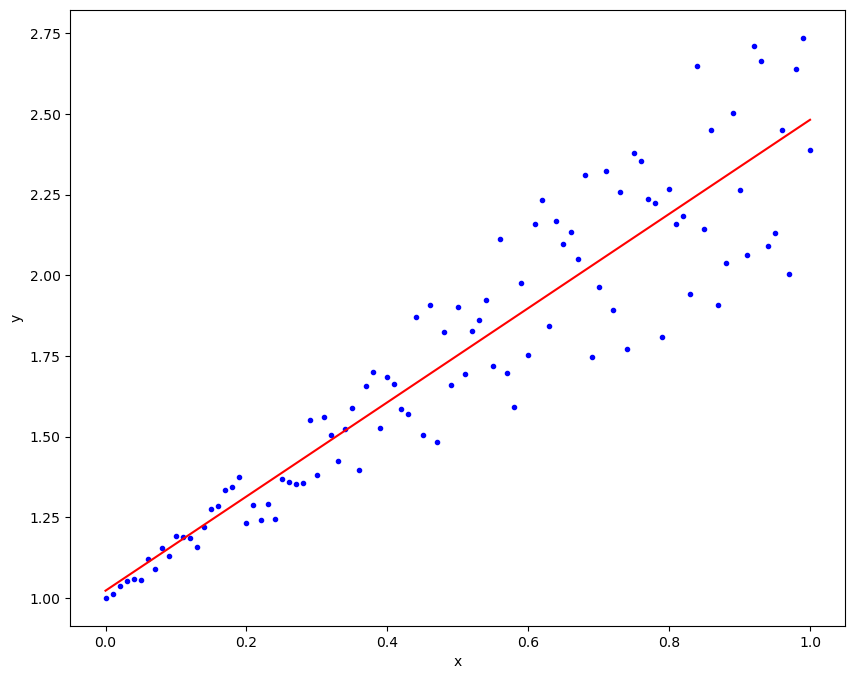

In [6]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use('seaborn-poster')

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()